In [5]:
import numpy as np
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.datasets.samples_generator import make_circles
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns
sns.set()

In [22]:
G=nx.read_edgelist('C:\Users\User\Desktop\New folder\email-Eu-core.txt',create_using=nx.Graph(),nodetype=int)


for x in range(G.number_of_nodes()):
    e=(x,x)
    if(G.has_edge(*e)):
        G.remove_edge(*e)
#G=nx.Graph()
#G.add_edge(1,2)
#G.add_edge(1,3)
#G.add_edge(1,5)
#G.add_edge(2,3)
#G.add_edge(3,4)
#G.add_edge(5,4)
#G.add_edge(6,5)
#G.add_edge(6,4)
print nx.info(G)

Name: 
Type: Graph
Number of nodes: 1005
Number of edges: 16064
Average degree:  31.9682


In [16]:
def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=5, alpha=1)

[[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


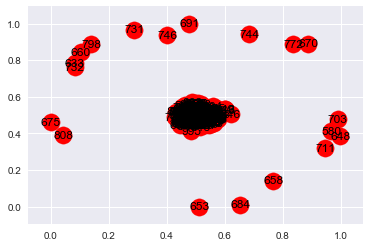

In [17]:
draw_graph(G)
W = nx.adjacency_matrix(G)
print(W.todense())

In [18]:
# degree matrix
D = np.diag(np.sum(np.array(W.todense()), axis=1))
print('degree matrix:')
print(D)
# laplacian matrix
L = D - W
print('laplacian matrix:')
print(L)

degree matrix:
[[42  0  0 ...  0  0  0]
 [ 0 50  0 ...  0  0  0]
 [ 0  0 93 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  1]]
laplacian matrix:
[[42 -1  0 ...  0  0  0]
 [-1 50  0 ...  0  0  0]
 [ 0  0 93 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  1]]


In [10]:
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)



eigenvalues:
[346.08069672+0.j 233.22632229+0.j 232.17670516+0.j ...   0.        +0.j
   0.        +0.j   0.        +0.j]
eigenvectors:
[[-1.84426832e-04+0.j -2.18331069e-04+0.j -3.82446663e-04+0.j ...
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 [-3.73763745e-04+0.j  4.11255499e-03+0.j  5.38199420e-03+0.j ...
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 [ 3.43788668e-03+0.j -1.09614169e-03+0.j -1.29290827e-03+0.j ...
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 ...
 [ 8.66594397e-07+0.j  2.39500303e-06+0.j  2.93963758e-06+0.j ...
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 [-9.13609478e-06+0.j  2.74876837e-06+0.j  4.33895130e-06+0.j ...
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 [-8.90489090e-06+0.j  2.32112527e-06+0.j  3.01365405e-06+0.j ...
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]]


In [11]:
max=0
k=0
for x in range(1,len(e)):
    val=e[x]-e[x-1]
    val=abs(val)
    if(max<val):
        max=val
        k=x
print(k)

1


In [12]:
from sklearn.cluster import KMeans
n_clusters=k
kmeans = KMeans(n_clusters)
kmeans.fit(v[:,1:n_clusters])
colors = kmeans.labels_


print("Clusters:", colors)

ValueError: Complex data not supported
[]
